In [3]:
from selenium import webdriver
from selenium.common.exceptions import ElementNotInteractableException
options = webdriver.ChromeOptions()
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# open it, go to a website, and get resu ts
chromedriver_path = "chromedriver.exe"
wd = webdriver.Chrome(chromedriver_path, options=options)


In [23]:
base_url = "https://www.bik.gov.tr/yerel-gazeteler/"
wd.get(base_url)
province_options = wd.find_element_by_class_name("iller").find_elements_by_tag_name("option")
provinces_dict = {}
for province in province_options:
    provinces_dict[province.get_attribute("value")] = province.text
    # print(province.text, province.get_attribute("value"))
print(provinces_dict)

{'': 'İl Seçiniz', 'adana': 'ADANA', 'adiyaman': 'ADIYAMAN', 'afyonkarahisar': 'AFYONKARAHİSAR', 'agri': 'AĞRI', 'aksaray': 'AKSARAY', 'amasya': 'AMASYA', 'ankara': 'ANKARA', 'antalya': 'ANTALYA', 'ardahan': 'ARDAHAN', 'artvin': 'ARTVİN', 'aydin': 'AYDIN', 'balikesir': 'BALIKESİR', 'bartin': 'BARTIN', 'batman': 'BATMAN', 'bayburt': 'BAYBURT', 'bilecik': 'BİLECİK', 'bingol': 'BİNGÖL', 'bitlis': 'BİTLİS', 'bolu': 'BOLU', 'burdur': 'BURDUR', 'bursa': 'BURSA', 'canakkale': 'ÇANAKKALE', 'cankiri': 'ÇANKIRI', 'corum': 'ÇORUM', 'denizli': 'DENİZLİ', 'diyarbakir': 'DİYARBAKIR', 'duzce': 'DÜZCE', 'edirne': 'EDİRNE', 'elazig': 'ELAZIĞ', 'erzincan': 'ERZİNCAN', 'erzurum': 'ERZURUM', 'eskisehir': 'ESKİŞEHİR', 'gaziantep': 'GAZİANTEP', 'giresun': 'GİRESUN', 'gumushane': 'GÜMÜŞHANE', 'hakkari': 'HAKKARİ', 'hatay': 'HATAY', 'igdir': 'IĞDIR', 'isparta': 'ISPARTA', 'istanbul': 'İSTANBUL', 'izmir': 'İZMİR', 'kahramanmaras': 'KAHRAMANMARAŞ', 'karabuk': 'KARABÜK', 'karaman': 'KARAMAN', 'kars': 'KARS', 'ka

In [28]:
newspapers_list = []
for province in provinces_dict.keys():
    wd.get(base_url + province)
    newspapers = wd.find_elements_by_class_name("newspaper-list-li")
    for newspaper in newspapers:
        record = {
                    "province": provinces_dict[province],
                    "newspaper": newspaper.find_element_by_class_name("description").text,
                    "newspaper_url": newspaper.find_element_by_tag_name("a").get_attribute("href")
                }
        newspapers_list.append(record)
        print(record)

{'province': 'ADANA', 'newspaper': 'Adana 5 Ocak', 'newspaper_url': 'https://www.bik.gov.tr/yerel-gazeteler/adana/tumu/adana-5-ocak/'}
{'province': 'ADANA', 'newspaper': 'Adana Güney Haber', 'newspaper_url': 'https://www.bik.gov.tr/yerel-gazeteler/adana/tumu/adana-guney-haber/'}
{'province': 'ADANA', 'newspaper': 'Crt Haber', 'newspaper_url': 'https://www.bik.gov.tr/yerel-gazeteler/adana/tumu/crt-haber/'}
{'province': 'ADANA', 'newspaper': 'Çukurova Barış', 'newspaper_url': 'https://www.bik.gov.tr/yerel-gazeteler/adana/tumu/cukurova-baris/'}
{'province': 'ADANA', 'newspaper': 'Çukurova Metropol', 'newspaper_url': 'https://www.bik.gov.tr/yerel-gazeteler/adana/tumu/cukurova-metropol/'}
{'province': 'ADANA', 'newspaper': 'Çukurova Press', 'newspaper_url': 'https://www.bik.gov.tr/yerel-gazeteler/adana/tumu/cukurova-press/'}
{'province': 'ADANA', 'newspaper': 'Gazette', 'newspaper_url': 'https://www.bik.gov.tr/yerel-gazeteler/adana/tumu/gazette/'}
{'province': 'ADANA', 'newspaper': 'Günaydı

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import interactive
interactive(True)

In [ ]:
newspapers_pd = pd.DataFrame(newspapers_list)
newspapers_pd.to_csv("yerel-gazeteler-export.csv", index_label="id")

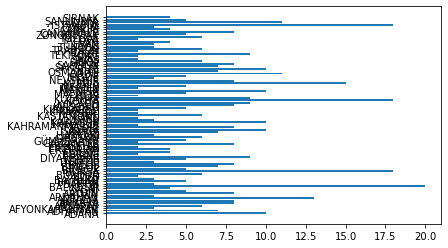

In [60]:
newspapers_pd.groupby("province").count()["newspaper"]

plt.barh(newspapers_pd.groupby("province").count().index,
    newspapers_pd.groupby("province").count()["newspaper"],
     )
plt.savefig("export.png")


ValueError: hist method requires numerical columns, nothing to plot.